## IMPORTING DEPENDENCIES

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/DeNoisedAugmentedDataset/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/DeNoisedAugmentedDataset/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/DeNoisedAugmentedDataset/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/DeNoisedAugmentedDataset/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/DeNoisedAugmentedDataset/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/DeNoisedAugmentedDataset/y_val.npy')

## NEURAL NETWORK MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten, Input
from keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from keras.layers import BatchNormalization
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(X_train[0].shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(98,) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


In [ ]:
from tensorflow.keras import optimizers
inputs = Input(shape=(98,1))
conv1 = Conv1D(32, 5, activation='relu')(inputs)
pool1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(64, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(2)(conv2)
flat = Flatten()(pool2)
dense1 = Dense(32, activation='relu')(flat)

q = Dense(128)(dense1)
k = Dense(128)(dense1)
v = Dense(128)(dense1)

q = Reshape((1, 128))(q)
k = Reshape((1, 128))(k)
v = Reshape((1, 128))(v)

attention = dot([q, k], axes=[2, 2])
attention = Activation('softmax')(attention)

output = dot([attention, v], axes=[2, 1])
output = Reshape((128,))(output)

output = Dense(2, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(amsgrad=True),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=120)
model.save("/content/gdrive/MyDrive/Colab Notebooks/FYP/CNNModel-MultiHead-Model_Augmented-LFCC-Wavelet.h5")

Epoch 1/120
528/528 [==============================] - 14s 6ms/step - loss: 0.5586 - accuracy: 0.7011 - val_loss: 0.5397 - val_accuracy: 0.7122
Epoch 2/120
528/528 [==============================] - 3s 7ms/step - loss: 0.5048 - accuracy: 0.7459 - val_loss: 0.4983 - val_accuracy: 0.7639
Epoch 3/120
528/528 [==============================] - 3s 6ms/step - loss: 0.4609 - accuracy: 0.7798 - val_loss: 0.4972 - val_accuracy: 0.7596
Epoch 4/120
528/528 [==============================] - 3s 5ms/step - loss: 0.4132 - accuracy: 0.8152 - val_loss: 0.4115 - val_accuracy: 0.8132
Epoch 5/120
528/528 [==============================] - 3s 5ms/step - loss: 0.3634 - accuracy: 0.8428 - val_loss: 0.4192 - val_accuracy: 0.8108
Epoch 6/120
528/528 [==============================] - 3s 5ms/step - loss: 0.3294 - accuracy: 0.8567 - val_loss: 0.3530 - val_accuracy: 0.8534
Epoch 7/120
528/528 [==============================] - 4s 7ms/step - loss: 0.2909 - accuracy: 0.8775 - val_loss: 0.3398 - val_accuracy: 0.857

In [ ]:
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.9346
[0.6983109712600708, 0.9345661401748657]


In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=219707a348572a50a6acadf41d98610942a472954954b67d495009f32eb79759
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=56f8ddb2635943c9ec99f331a463941af5c8d101481ba2d80b7982c6d771f214
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

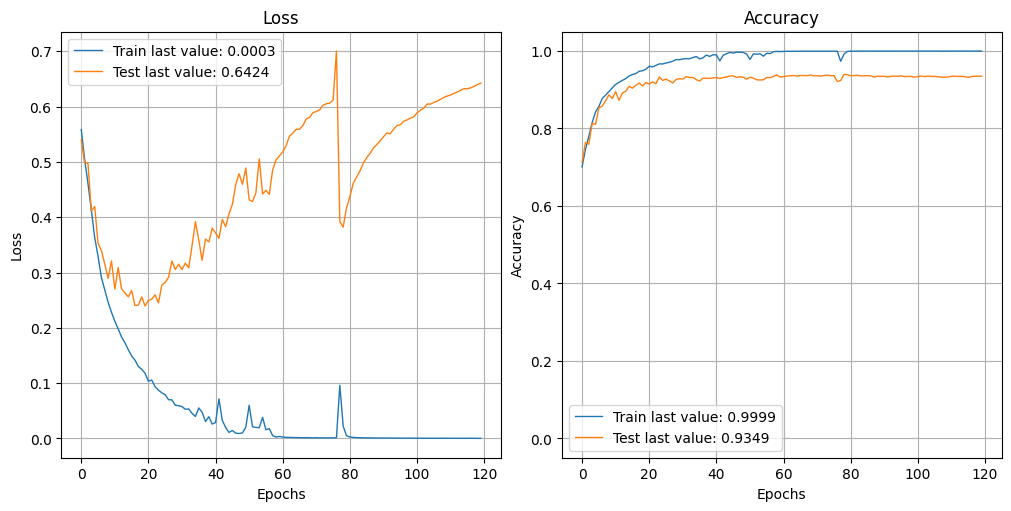

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1049
           1       0.93      0.94      0.93      1060

    accuracy                           0.93      2109
   macro avg       0.93      0.93      0.93      2109
weighted avg       0.93      0.93      0.93      2109

Confusion matrix, without normalization
[[979  70]
 [ 68 992]]


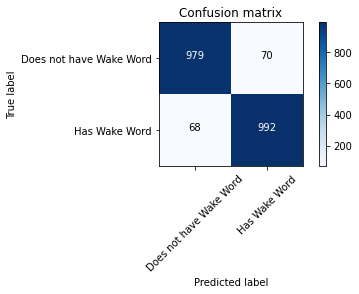

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])